### Peter Gwartney
### Final Project - Building a Gravitational Lens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
from astropy import units as u
from astropy import constants as const

In [2]:
def beta(theta, M, Dratio, Ds, scale):
    theta = theta*scale # convert from pixels to radians
    Ds = Ds*u.Mpc
    M = M * const.M_sun
    G = const.G
    c = const.c
    
    b = theta - (Dratio/Ds) * 4 * G * M/(c**2)/theta
    return b/scale # convert back to pixels

def radius_e(M, Dratio, Ds, scale):
    Ds = Ds*u.Mpc
    M = M * const.M_sun
    G = const.G
    c = const.c
    return np.sqrt(Dratio/Ds * 4 * G * M/(c**2))/scale

def circle(x, y, x0, y0, r):
    if (x-x0)**2 + (y-y0)**2 <= r**2:
        return True
    else:
        return False

For these plots, the lens will be a $2.5 \times 10^{15} M_\odot$ object in front of a background $D_S =55 Mpc$ away, with a ratio of the distances $D_{LS}/D_{L} = 0.22$

In [3]:
mass = 2.5*10**15 # Msun
dratio = 0.22 # Dls is 0.22 of Dl
ds = 55 # Mpc
scale = 1/(20*3437.7) # For these I'll use a scale of 200 pixels ~ 10 arcmin, so about 20 pixels per arcmin and there's 3437.7 arcmin per radian.
re = radius_e(mass, dratio, ds, scale)

### a.

In [14]:
x0=145
y0=145
r=12

xl = 150
yl = 150

img_a = np.ones((300,300,3))
for i in range(300):
    for j in range(300):
        if circle(i,j, x0, y0, r):
            img_a[i,j,0] = 0
            img_a[i,j,1] = 1
            img_a[i,j,2] = 0.5
            
for j in range(300):
    for i in range(300):
        try:
            if (i-xl) == 0:
                phi = np.pi/2
                if (j-yl) < 0:
                    phi = -phi 
            else:
                phi = np.arctan((j-yl)/(i-xl))

            theta = np.sqrt((i-xl)**2 + (j-yl)**2)
            b = beta(theta, mass, dratio, ds, scale)
            bi = b*np.cos(phi)
            bj = b*np.sin(phi)

            if i >= xl:
                bj=-bj
                bi=-bi
            if img_a[xl-int(bi),yl-int(bj),0] == 0:
                img_a[i,j,0] = 0.5
                img_a[i,j,1] = 0.6
                img_a[i,j,2] = 0.4

        except:
            pass

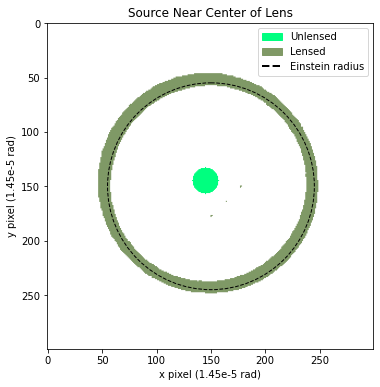

In [31]:
color1 = (0,1,0.5)
color2 = (0.5,0.6,0.4)

fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(img_a)
ax.add_patch(Circle((xl,yl),radius=re.to(u.dimensionless_unscaled), fill=False, linestyle='--', edgecolor='black'))
legend_elements = [Circle((0,0), color= color1, label='Unlensed'), Circle((0,0), color= color2, label='Lensed'),Line2D([0], [0], color='black', ls='--',lw=2, label='Einstein radius')]
ax.legend(handles=legend_elements)
ax.set_title('Source Near Center of Lens')
ax.set_xlabel('x pixel (1.45e-5 rad)')
ax.set_ylabel('y pixel (1.45e-5 rad)')
plt.show()

### b.

In [6]:
x0=94
y0=90
r=12

xl = 150
yl = 150

img_b = np.ones((300,300,3))
for i in range(300):
    for j in range(300):
        if circle(i,j, x0, y0, r):
            img_b[i,j,0] = 0
            img_b[i,j,1] = 1
            img_b[i,j,2] = 0.5
            
for j in range(300):
    for i in range(300):
        try:
            if (i-xl) == 0:
                phi = np.pi/2
                if (j-yl) < 0:
                    phi = -phi 
            else:
                phi = np.arctan((j-yl)/(i-xl))

            theta = np.sqrt((i-xl)**2 + (j-yl)**2)
            b = beta(theta, mass, dratio, ds, scale)
            bi = b*np.cos(phi)
            bj = b*np.sin(phi)

            if i >= xl:
                bj=-bj
                bi=-bi
            if img_b[xl-int(bi),yl-int(bj),0] == 0:
                img_b[i,j,0] = 0.5
                img_b[i,j,1] = 0.6
                img_b[i,j,2] = 0.4

        except:
            pass

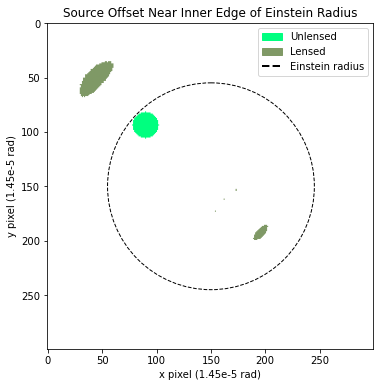

In [32]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(img_b)
ax.add_patch(Circle((xl,yl),radius=re.to(u.dimensionless_unscaled), fill=False, linestyle='--', edgecolor='black'))
legend_elements = [Circle((0,0), color= color1, label='Unlensed'), Circle((0,0), color= color2, label='Lensed'),Line2D([0], [0], color='black', ls='--',lw=2, label='Einstein radius')]
ax.legend(handles=legend_elements)
ax.set_title('Source Offset Near Inner Edge of Einstein Radius')
ax.set_xlabel('x pixel (1.45e-5 rad)')
ax.set_ylabel('y pixel (1.45e-5 rad)')
plt.show()

### c.

In [8]:
x0=74
y0=70
r=12

xl = 150
yl = 150

img_c = np.ones((300,300,3))
for i in range(300):
    for j in range(300):
        if circle(i,j, x0, y0, r):
            img_c[i,j,0] = 0
            img_c[i,j,1] = 1
            img_c[i,j,2] = 0.5
            
for j in range(300):
    for i in range(300):
        try:
            if (i-xl) == 0:
                phi = np.pi/2
                if (j-yl) < 0:
                    phi = -phi 
            else:
                phi = np.arctan((j-yl)/(i-xl))

            theta = np.sqrt((i-xl)**2 + (j-yl)**2)
            b = beta(theta, mass, dratio, ds, scale)
            bi = b*np.cos(phi)
            bj = b*np.sin(phi)

            if i >= xl:
                bj=-bj
                bi=-bi
            if img_c[xl-int(bi),yl-int(bj),0] == 0:
                img_c[i,j,0] = 0.5
                img_c[i,j,1] = 0.6
                img_c[i,j,2] = 0.4

        except:
            pass

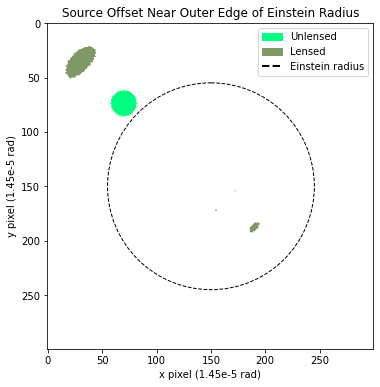

In [33]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(img_c)
ax.add_patch(Circle((xl,yl),radius=re.to(u.dimensionless_unscaled), fill=False, linestyle='--', edgecolor='black'))
legend_elements = [Circle((0,0), color= color1, label='Unlensed'), Circle((0,0), color= color2, label='Lensed'),Line2D([0], [0], color='black', ls='--',lw=2, label='Einstein radius')]
ax.legend(handles=legend_elements)
ax.set_title('Source Offset Near Outer Edge of Einstein Radius')
ax.set_xlabel('x pixel (1.45e-5 rad)')
ax.set_ylabel('y pixel (1.45e-5 rad)')
plt.show()

In [21]:
img = mpimg.imread('./deepfield.jpg')
img2 = np.zeros([680, 1002, 3], dtype=int)
np.median(img)

18.0

In [22]:
np.shape(img)

(680, 1002, 3)

In [23]:
y = 500
x = 325

For this image, the lens will be a $10^{17} M_\odot$ object in front of a background $D_S = 1000 Mpc$ away, with a ratio of the distances $D_{LS}/D_{L} = 0.22$ as before. We will assume the same plate scale as the previous plots.

In [45]:
mass = 10**17
ds = 1000

for j in range(1002):
    for i in range(680):
        try:
            if (i-x) == 0:
                phi = np.pi/2
                if (j-y) < 0:
                    phi = -phi 
            else:
                phi = np.arctan((j-y)/(i-x))

            theta = np.sqrt((i-x)**2 + (j-y)**2)
            b = beta(theta, mass, dratio, ds, scale)
            bi = b*np.cos(phi)
            bj = b*np.sin(phi)

            if i >= x:
                bj=-bj
                bi=-bi
            img2[i,j,0] = img[x-int(bi), y-int(bj),0]
            img2[i,j,1] = img[x-int(bi), y-int(bj),1]
            img2[i,j,2] = img[x-int(bi), y-int(bj),2]
        except:
            img2[i,j, 0] = np.median(img)
            img2[i,j, 1] = np.median(img)
            img2[i,j, 2] = np.median(img)

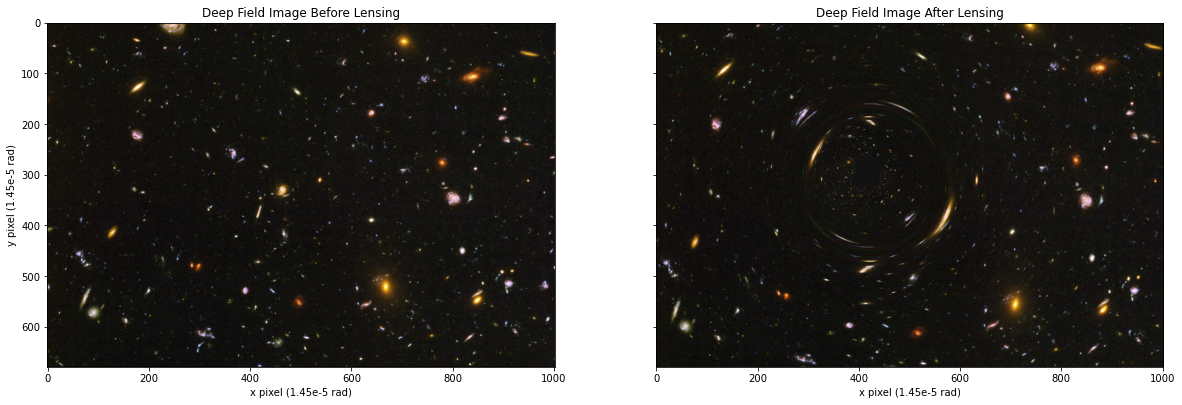

In [46]:
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)
ax[0].imshow(img)
ax[1].imshow(img2)
ax[0].set_title('Deep Field Image Before Lensing')
ax[1].set_title('Deep Field Image After Lensing')
ax[0].set_ylabel('y pixel (1.45e-5 rad)')
ax[0].set_xlabel('x pixel (1.45e-5 rad)')
ax[1].set_xlabel('x pixel (1.45e-5 rad)')
plt.show()